In [1]:
from contextlib import contextmanager,redirect_stderr,redirect_stdout
from os import devnull

@contextmanager
def suppress_stdout_stderr():
    """A context manager that redirects stdout and stderr to devnull"""
    with open(devnull, 'w') as fnull:
        with redirect_stderr(fnull) as err, redirect_stdout(fnull) as out:
            yield (err, out)

import simpy
import numpy as np
import pandas as pd
from numpy import random
import math
import matplotlib as plt
import seaborn as sns
from fifo import startSimulation as fifo
from helper import print_sim_results

from ticket import startSimulation as ticket
RANDOM_SEED = 42
### problem paramters ####
parameters = {
    "order_time_mu" : 4,
    "order_time_min" : 1,
    "food_prepare_mu" : 6,
    "food_prepare_min" : 1,
    "lamb" : 2.5
}
n_kitchen = 2
n_counter = 3
n_customer = 2000
SIM_TIME = 50 * 60


column_names = ["Arrival Time","Current Q Length","Q time","Service Start Time",
                "Food prepare start","Exit system time","Food Prepare Duration",
                "Total Wait Time(Queue+Food)","Service Time","Total Time in System"]

In [2]:
with suppress_stdout_stderr():
    ticket_results = ticket(n_customer,n_counter,n_kitchen,SIM_TIME,parameters)
#     fifo_results = fifo(n_customer,n_counter,n_kitchen,SIM_TIME,parameters) 

In [3]:
print("Ticket")
print_sim_results(ticket_results,n_kitchen,n_counter)

Ticket

1045 Customers served
Total Simulation Time=> 3000.00 Minutes
Total Idle Time for 3 Counters=> -1389.00 Minutes
Average Queue Length=> 368 
Max Queue Length=> 719 

Average Waiting Time => 1883.07 Minutes
Average Service Time => 4.20 Minutes
Average Time Spent In System => 1313.57 Minutes


In [4]:
# print("Fifo")
# print_sim_results(fifo_results,n_kitchen,n_counter)

In [71]:
val_lamb = np.arange(1, 10, 0.05)
# ticket_results = []
avg_waiting = np.zeros([len(val_lamb),2])

with suppress_stdout_stderr():
    for i in range(len(val_lamb)):
        parameters["lamb"] = val_lamb[i]
        ticket_results = ticket(n_customer,n_counter,n_kitchen,SIM_TIME,parameters)
        fifo_results = fifo(n_customer,n_counter,n_kitchen,SIM_TIME,parameters) 
        
        avg_waiting[i] =[ticket_results[0].iloc[:,7].mean(),
                         fifo_results[0].iloc[:,7].mean()]

In [72]:
# ticket_results[0].iloc[:,2].mean()/SIM_TIME

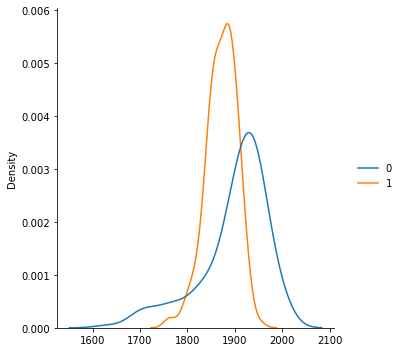

In [73]:
# avg = pd.DataFrame(avg_waiting,index=val_lamb,
#                    columns = ["fifo","ticket"])
sns.displot(avg_waiting,kind="kde")